**This notebook is an exercise in the [Data Visualization](https://www.kaggle.com/learn/data-visualization) course.  You can reference the tutorial at [this link](https://www.kaggle.com/alexisbcook/final-project).**

---


Now it's time for you to demonstrate your new skills with a project of your own!

In this exercise, you will work with a dataset of your choosing.  Once you've selected a dataset, you'll design and create your own plot to tell interesting stories behind the data!

## Setup

Run the next cell to import and configure the Python libraries that you need to complete the exercise.

In [1]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print("Setup Complete")

Setup Complete


The questions below will give you feedback on your work. Run the following cell to set up the feedback system.

In [2]:
# Set up code checking
from learntools.core import binder
binder.bind(globals())
from learntools.data_viz_to_coder.ex7 import *
print("Setup Complete")

Setup Complete


## Step 1: Attach a dataset to the notebook

Begin by selecting a CSV dataset from [Kaggle Datasets](https://www.kaggle.com/datasets).  If you're unsure how to do this, please revisit the instructions in the previous tutorial.

Once you have selected a dataset, click on the **[+ Add data]** option in the top right corner.  This will generate a pop-up window that you can use to search for your chosen dataset.  

![ex6_search_dataset](https://storage.googleapis.com/kaggle-media/learn/images/cIIWPUS.png)

Once you have found the dataset, click on the **[Add]** button to attach it to the notebook.  You can check that it was successful by looking at the **Data** dropdown menu to the right of the notebook -- look for an **input** folder containing a subfolder that matches the name of the dataset.

<center>
<img src="https://storage.googleapis.com/kaggle-media/learn/images/nMYc1Nu.png" width=30%><br/>
</center>

You can click on the carat to the left of the name of the dataset to double-check that it contains a CSV file.  For instance, the image below shows that the example dataset contains two CSV files: (1) **dc-wikia-data.csv**, and (2) **marvel-wikia-data.csv**.

<center>
<img src="https://storage.googleapis.com/kaggle-media/learn/images/B4sJkVA.png" width=30%><br/>
</center>

Once you've uploaded a dataset with a CSV file, run the code cell below **without changes** to receive credit for your work!

In [3]:
# Check for a dataset with a CSV file
step_1.check()

<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct:</span> 



## Step 2: Specify the filepath

Now that the dataset is attached to the notebook, you can find its filepath.  To do this, begin by clicking on the CSV file you'd like to use.  This will open the CSV file in a tab below the notebook.  You can find the filepath towards the top of this new tab.  

![ex6_filepath](https://storage.googleapis.com/kaggle-media/learn/images/fgXQV47.png)

After you find the filepath corresponding to your dataset, fill it in as the value for `my_filepath` in the code cell below, and run the code cell to check that you've provided a valid filepath.  For instance, in the case of this example dataset, we would set
```
my_filepath = "../input/fivethirtyeight-comic-characters-dataset/dc-wikia-data.csv"
```  
Note that **you must enclose the filepath in quotation marks**; otherwise, the code will return an error.

Once you've entered the filepath, you can close the tab below the notebook by clicking on the **[X]** at the top of the tab.

In [6]:
# Fill in the line below: Specify the path of the CSV file to read
my_filepath = '/kaggle/input/gun-deaths-in-the-us-1968-2021/guns_2020.csv'

# Check for a valid filepath to a CSV file in a dataset
step_2.check()

<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct:</span> 



## Step 3: Load the data

Use the next code cell to load your data file into `my_data`.  Use the filepath that you specified in the previous step.

In [7]:
# Fill in the line below: Read the file into a variable my_data
my_data = pd.read_csv(my_filepath)

# Check that a dataset has been uploaded into my_data
step_3.check()

<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct:</span> 



**_After the code cell above is marked correct_**, run the code cell below without changes to view the first five rows of the data.

In [9]:
# Print the first five rows of the data
my_data.head()

,year,month,intent,police,sex,age,race,hispanic,place,education
0,2020,1,Suicide,0,M,64.0,White,100,Home,BA+
1,2020,1,Suicide,0,F,39.0,White,100,Home,Some college
2,2020,1,Suicide,0,M,20.0,Native American/Native Alaskan,100,Home,HS/GED
3,2020,1,Suicide,0,F,65.0,White,100,Home,HS/GED
4,2020,1,Suicide,0,M,31.0,Hispanic,210,Home,Less than HS


## Step 4: Visualize the data

Use the next code cell to create a figure that tells a story behind your dataset.  You can use any chart type (_line chart, bar chart, heatmap, etc_) of your choosing!

<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct:</span> 



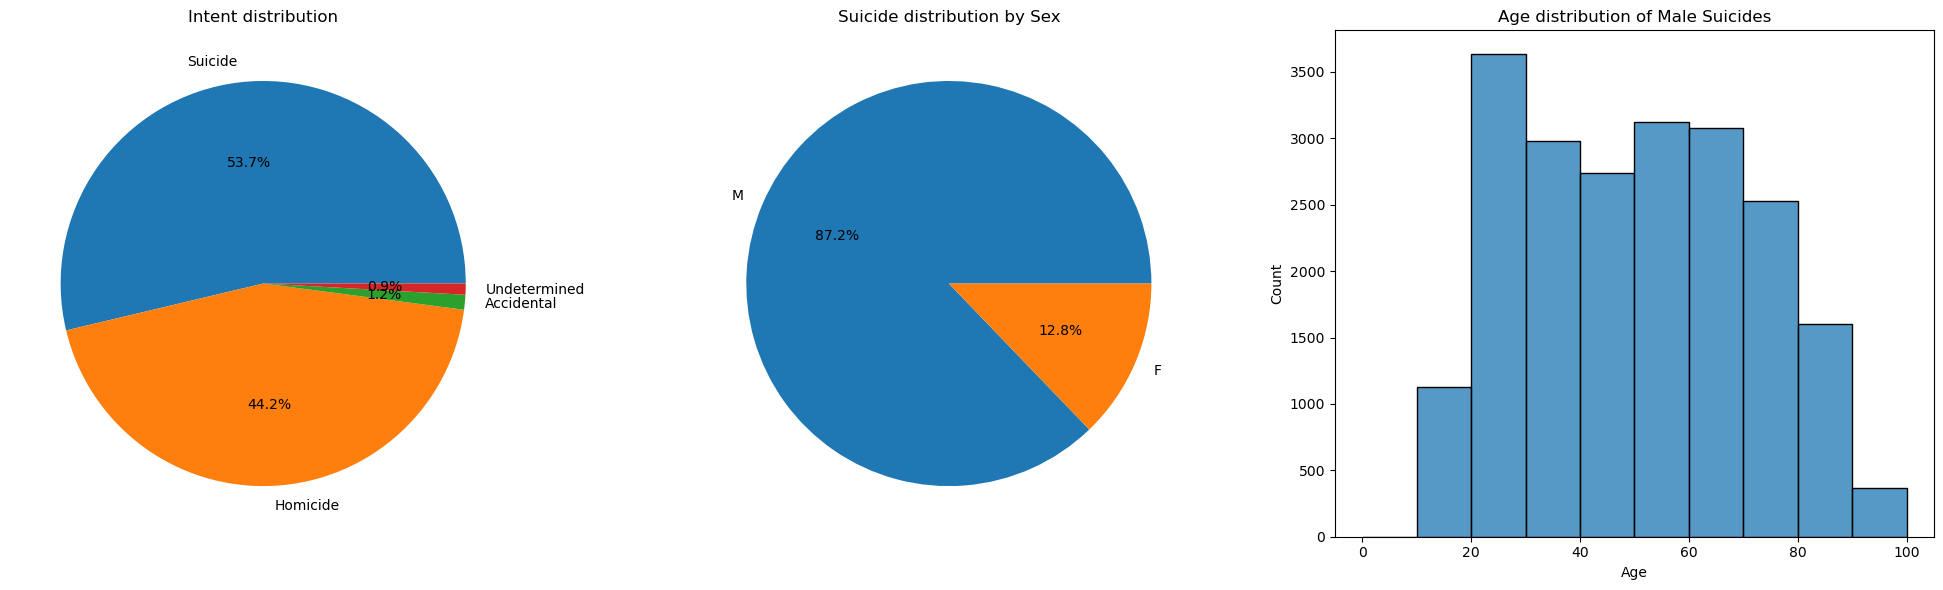

In [39]:
# Analysis of the 'intent' column shows that the most common reason for gun death is suicide.
intent_counts = my_data['intent'].value_counts()

# Further analysis of suicides by sex reveals that suicides are more common among men.
suicide_sex_counts = my_data[my_data['intent'] == 'Suicide']['sex'].value_counts()

# To identify the age group most affected by suicides among men, we filter for 'Suicide' in 'intent' and 'M' in 'sex'.
male_suicide_ages = my_data[(my_data['intent'] == 'Suicide') & (my_data['sex'] == 'M')]['age']

# Now we plot our findings.
fig = plt.figure(figsize=(20, 6))

# The first plot illustrates the distribution of gun deaths by intent.
plt.subplot(1, 3, 1)
plt.pie(intent_counts, labels = intent_counts.index, autopct='%1.1f%%')
plt.title('Intent distribution')

# The second plot shows the distribution of suicides by sex, highlighting the high rate among men.
plt.subplot(1, 3, 2)
plt.pie(suicide_sex_counts, labels = suicide_sex_counts.index, autopct='%1.1f%%')
plt.title('Suicide distribution by Sex')

# The third plot shows the age distribution of male suicides. We can see that males between the ages of 20 and 80 are particularly at risk.
# Given the roughly uniform distribution of the male population between the ages of 20-65, this information suggests the need for increased mental health checkups within this demographic.
plt.subplot(1, 3, 3)
sns.histplot(data=male_suicide_ages, bins=[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100], kde=False)
plt.title('Age distribution of Male Suicides')
plt.xlabel('Age')
plt.ylabel('Count')

plt.tight_layout()

# The current data provides valuable insights, but incorporating more granular data, such as information at the state level, could allow for more precise identification of at-risk groups and hence more targeted interventions.



# Check that a figure appears below
step_4.check()

## Keep going

Learn how to use your skills after completing the micro-course to create data visualizations in a **[final tutorial](https://www.kaggle.com/alexisbcook/creating-your-own-notebooks)**.

---




*Have questions or comments? Visit the [course discussion forum](https://www.kaggle.com/learn/data-visualization/discussion) to chat with other learners.*